# Optimal Pricing Model for New Constructions Listings at Zillow Group
---
In the past year, Zillow Group has pivoted their business model towards a real estate transaction process with the long term vision of being an all-in-one digital marketplace for buying and selling houses. Additionally, Zillow Group still sells substantial real estate advertising space and their Decision Science team now has a pivotal decision to make that might affect their long term profitability and success: 

> Should the Zillow New Construction sales team charge their customers 400 Dollars per community listed per month or 40 Dollars per lead received?

This project aims to settle this contested debate by analyzing the growth rates of constituent key metrics like leads, number of communities and ultimately revenue generated, for each pricing model over 3 years and suggesting an optimal model while stating the caveats and drawbacks to present a rounded solution

In [1]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

import pandas as pd
import matplotlib.ticker as tck
import matplotlib.pyplot as plt

In [2]:
# initialize date ranges and objects for iteration
initial_month = datetime.strptime('01-2018', '%m-%Y')
final_month = datetime.strptime('12-2020', '%m-%Y')

ppl_initial_comms = ppc_initial_comms = 6174
ppl_initial_leadpcpm = 4
ppl_price = 40
ppc_price = 400
ppl_new_comms = ppc_new_comms = 0
growth_years = ['2018','2019','2020']

leadpcpm_growth_dict = {}
leadpcpm_rate_dict = {}
ppl_comms_dict = {}
ppl_rate_dict = {}
ppl_rev_dict = {}

ppc_comms_dict = {}
ppc_rate_dict = {}
ppc_rev_dict = {}

In [3]:
#Baseline Revenue Statistics - January 2018
ppl_baseline_revenue = ppl_initial_leadpcpm * ppl_price * ppl_initial_comms 
print('Pay Per Lead Model baseline revenue in January 2018:',"${:,}".format(ppl_baseline_revenue))

ppc_baseline_revenue = ppc_price * ppc_initial_comms
print('Pay Per Community Model baseline revenue in January 2018:',"${:,}".format(ppc_baseline_revenue))
print('Pay Per Community model generates',str(round(ppc_baseline_revenue/ppl_baseline_revenue,1)) 
      , 'times the revenue of Pay Per Lead model at baseline in January 2018')

Pay Per Lead Model baseline revenue in January 2018: $987,840
Pay Per Community Model baseline revenue in January 2018: $2,469,600
Pay Per Community model generates 2.5 times the revenue of Pay Per Lead model at baseline in January 2018


In [4]:
# For loop to create dictionaries of growth rates of Leads per community per month,
# Pay Per Lead model communities and Pay Per Community model communities over 3 years
for year in growth_years:
    if year == '2018':
        leadpcpm_rate_dict[year] = 5
        ppl_rate_dict[year] = 6
        ppc_rate_dict[year] = 0.9 * ppl_rate_dict[year]

    elif year == '2019':
        leadpcpm_rate_dict[year] = 4
        ppl_rate_dict[year] = 4
        ppc_rate_dict[year] = 0.9 * ppl_rate_dict[year]

    elif year == '2020':
        leadpcpm_rate_dict[year] = 1
        ppl_rate_dict[year] = 2
        ppc_rate_dict[year] = 0.9 * ppl_rate_dict[year]

In [5]:
# While loop to increment MoM: Leads per community per month, Pay Per Lead model communities and
# Pay Per Community model communities over 3 years
while(initial_month != final_month+relativedelta(months=1)):
    initial_year = str(initial_month.year)
    # initial_year_month_name = initial_year + '-' + initial_month.strftime("%b")

    if initial_year in growth_years:
        ppl_new_leadpcpm = ppl_initial_leadpcpm + ((ppl_initial_leadpcpm*leadpcpm_rate_dict[initial_year]) / 100)
        ppl_initial_leadpcpm = ppl_new_leadpcpm
        leadpcpm_growth_dict[initial_month] = ppl_new_leadpcpm
        
        ppl_new_comms = ppl_initial_comms + ((ppl_initial_comms*ppl_rate_dict[initial_year]) / 100)
        ppl_initial_comms = ppl_new_comms
        ppl_rev = ppl_new_comms * ppl_new_leadpcpm * ppl_price
        ppl_comms_dict[initial_month] = ppl_new_comms
        ppl_rev_dict[initial_month] = ppl_rev
        
        ppc_new_comms = ppc_initial_comms + ((ppc_initial_comms*ppc_rate_dict[initial_year]) / 100)
        ppc_initial_comms = ppc_new_comms
        ppc_rev = ppc_new_comms * ppc_price
        ppc_comms_dict[initial_month] = ppc_new_comms
        ppc_rev_dict[initial_month] = ppc_rev

        initial_month += relativedelta(months=1)

In [6]:
# Parse results of relevant metrics into Pandas DataFrame for analysis
leadpcpm_series = pd.Series(leadpcpm_growth_dict)
ppl_comms_series = pd.Series(ppl_comms_dict)
ppl_rev_series = pd.Series(ppl_rev_dict)

ppc_comms_series = pd.Series(ppc_comms_dict)
ppc_rev_series = pd.Series(ppc_rev_dict)

metrics_df = pd.DataFrame(data={'Leads Growth': round(leadpcpm_series,2), 
                                'PayPerLeadComms': round(ppl_comms_series).astype(int), 
                                'PayPerLeadRev': round(ppl_rev_series).astype(int), 
                                'PayPerCommComms': round(ppc_comms_series).astype(int),  
                                'PayPerCommRev': round(ppc_rev_series).astype(int), 
                                'PayPerCommPrice': 400,
                                'LeadsRev': 40 * round(leadpcpm_series,2)
                               })

#Remove Date Index -> Reset to Default Integer Index -> Shift Date column to be first in order
metrics_df['Date'] = metrics_df.index
metrics_df = metrics_df.reset_index(drop=True).sort_values('Date')
cols = metrics_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
metrics_df = metrics_df[cols]

print(metrics_df)

         Date  Leads Growth  PayPerLeadComms  PayPerLeadRev  PayPerCommComms  \
0  2018-01-01          4.20             6544        1099466             6507   
1  2018-02-01          4.41             6937        1223706             6859   
2  2018-03-01          4.63             7353        1361984             7229   
3  2018-04-01          4.86             7795        1515889             7620   
4  2018-05-01          5.11             8262        1687184             8031   
5  2018-06-01          5.36             8758        1877836             8465   
6  2018-07-01          5.63             9283        2090031             8922   
7  2018-08-01          5.91             9840        2326205             9404   
8  2018-09-01          6.21            10431        2589066             9911   
9  2018-10-01          6.52            11057        2881630            10447   
10 2018-11-01          6.84            11720        3207254            11011   
11 2018-12-01          7.18            1

We can roughly see that the Pay Per Lead model revenue **outgrew** the Pay per Community model revenue by the end of 2020. But let's visualize the results to bring these numbers to life and see how the growth trended for each pair of key metrics for both the pricing models overtime. This will also show us exactly when Pay Per Lead crossed over to generate more revenue than Pay Per Community and the factors that contributed to this inversion

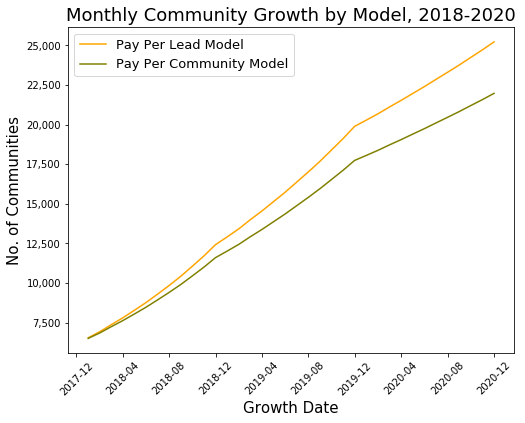

In [7]:
# Visualize Community Growth for Pricing Models
fig, ax= plt.subplots(figsize=(8,6))
plt.plot(metrics_df['Date'],metrics_df['PayPerLeadComms'], c='orange', label='Pay Per Lead Model')
plt.plot(metrics_df['Date'],metrics_df['PayPerCommComms'], c='olive', label='Pay Per Community Model')
plt.legend(loc='upper left', fontsize=13)
ax.get_yaxis().set_major_formatter(tck.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation = 45)
plt.xlabel('Growth Date', fontsize=15)
plt.ylabel('No. of Communities', fontsize=15)
plt.title('Monthly Community Growth by Model, 2018-2020', fontsize=18)
plt.show()

In [13]:
# Final Community Statistics - December 2020
ppl_final_communities = metrics_df['PayPerLeadComms'].iloc[-1]
ppc_final_communities = metrics_df['PayPerCommComms'].iloc[-1]

print('Pay Per Lead model results in:', ppl_final_communities, 'communities in December 2020')
print('Pay Per Community model results in:', ppc_final_communities, 'communities in December 2020')

Pay Per Lead model results in: 25225 communities in December 2020
Pay Per Community model results in: 21976 communities in December 2020


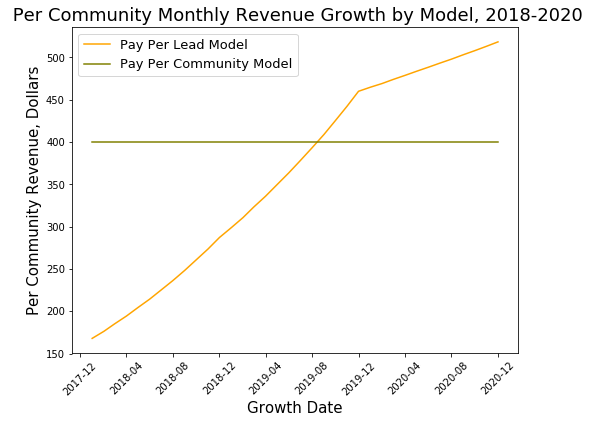

In [12]:
# Visualize Per Community Revenue Growth for Pricing Models
fig = plt.figure(figsize=(8,6))
plt.plot(metrics_df['Date'],metrics_df['LeadsRev'], c='orange', label='Pay Per Lead Model')
plt.plot(metrics_df['Date'],metrics_df['PayPerCommPrice'], c='olive', label='Pay Per Community Model')
plt.legend(loc='upper left', fontsize=13)
plt.xticks(rotation = 45)
plt.xlabel('Growth Date', fontsize=15)
plt.ylabel('Per Community Revenue, Dollars', fontsize=15)
plt.title(' Per Community Monthly Revenue Growth by Model, 2018-2020', fontsize=18)
plt.show()

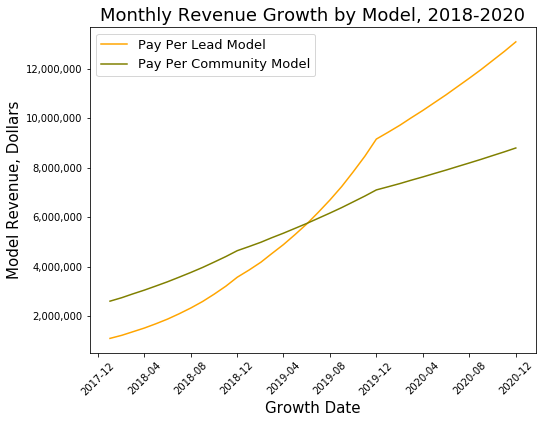

In [10]:
# Visualize Revenue Growth for Pricing Models to select the Optimal Pricing Model
fig, ax= plt.subplots(figsize=(8,6))
plt.plot(metrics_df['Date'],metrics_df['PayPerLeadRev'], c='orange', label='Pay Per Lead Model')
plt.plot(metrics_df['Date'],metrics_df['PayPerCommRev'], c='olive', label='Pay Per Community Model')
# plt.ticklabel_format(useOffset=False, style='plain')
plt.legend(loc='upper left', fontsize=13)
ax.get_yaxis().set_major_formatter(tck.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation = 45)
plt.xlabel('Growth Date', fontsize=15)
plt.ylabel('Model Revenue, Dollars', fontsize=15)
plt.title('Monthly Revenue Growth by Model, 2018-2020', fontsize=18)
plt.show()

In [11]:
# Final Revenue Statistics - December 2020
ppl_final_revenue = metrics_df['PayPerLeadRev'].iloc[-1]
print('Revenue generated in December 2020 by Pay Per Lead Model:',"${:,}".format(ppl_final_revenue))

ppc_final_revenue = metrics_df['PayPerCommRev'].iloc[-1]
print('Revenue generated in December 2020 by Pay Per Community Model:',"${:,}".format(ppc_final_revenue))
print('\n')
print('In stark contrast to baseline revenue, Pay Per Lead model now generates', 
      str(round(ppl_final_revenue/ppc_final_revenue,1)), 'times the revenue of Pay Per Community model in December 2020')

Revenue generated in December 2020 by Pay Per Lead Model: $13,076,372
Revenue generated in December 2020 by Pay Per Community Model: $8,790,313


In stark contrast to baseline revenue, Pay Per Lead model now generates 1.5 times the revenue of Pay Per Community model in December 2020
